Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-Credit.csv")
df.head(5)


,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [2]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance'],
      dtype='object')

In [3]:
len(df) #Total Instances/Samples

400

In [4]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


There is no missing value in this dataset

**Handling categorical values or encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
df['Own'] = le.fit_transform(df['Own'])
df['Student'] = le.fit_transform(df['Student'])
df['Married'] = le.fit_transform(df['Married'])
df['Region'] = le.fit_transform(df['Region'])


In [8]:
df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,1,333
1,106.025,6645,483,3,82,15,1,1,1,2,903
2,104.593,7075,514,4,71,11,0,0,0,2,580
3,148.924,9504,681,3,36,11,1,0,0,2,964
4,55.882,4897,357,2,68,16,0,0,1,1,331
5,80.180,8047,569,4,77,10,0,0,0,1,1151
6,20.996,3388,259,2,37,12,1,0,0,0,203
7,71.408,7114,512,2,87,9,0,0,0,2,872
8,15.125,3300,266,5,66,13,1,0,0,1,279
9,71.061,6819,491,3,41,19,1,1,1,0,1350


In [9]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance


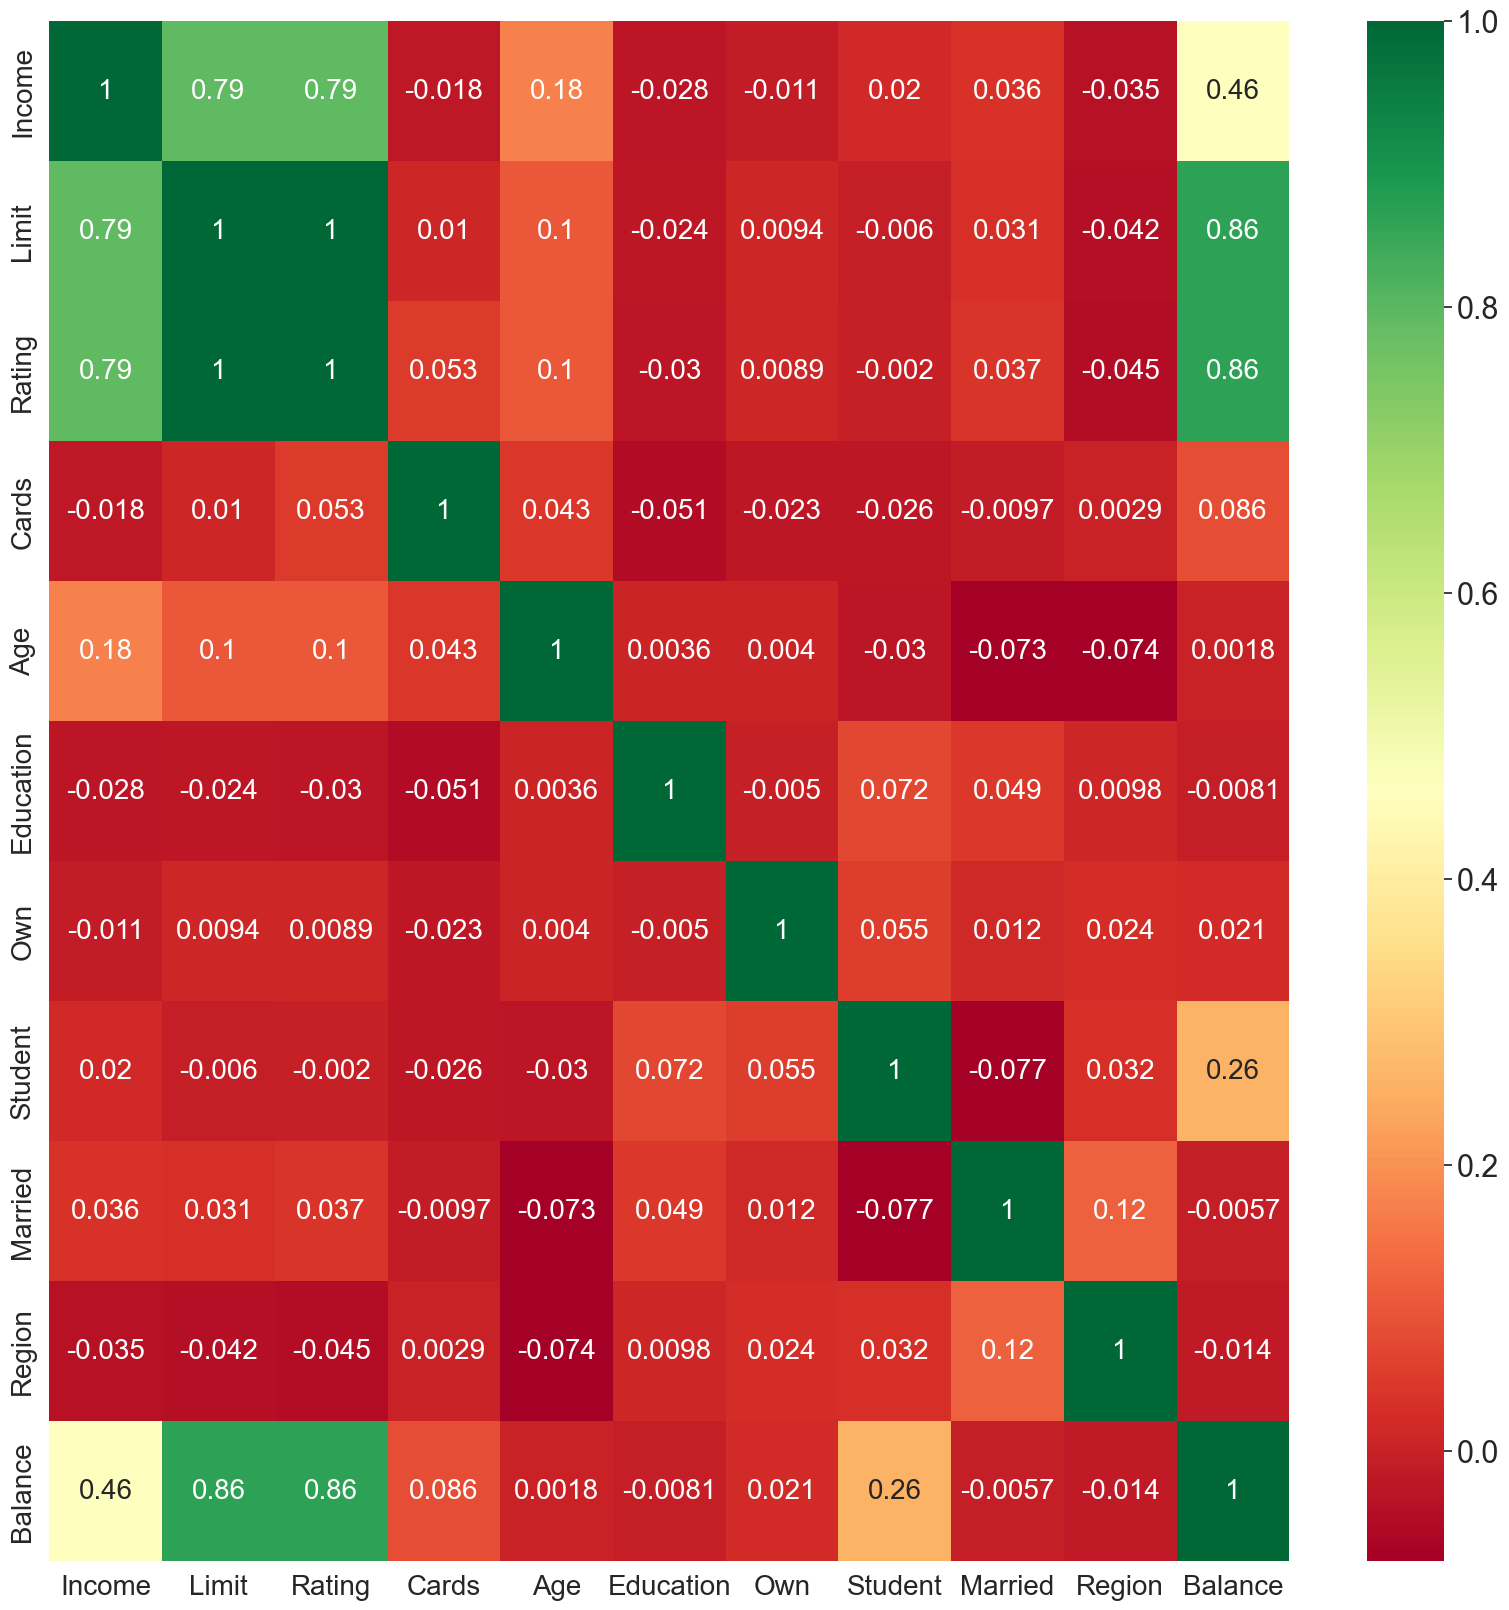

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

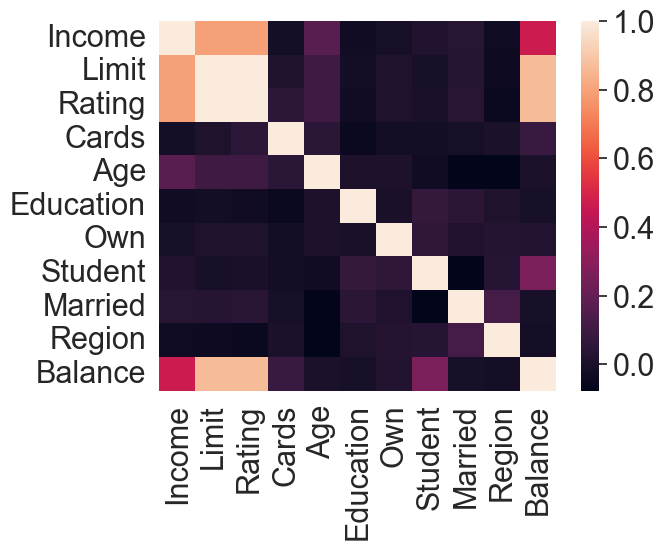

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop(columns=['Balance', 'Own'])
y = df['Balance']


In [13]:
X

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Region
0,14.891,3606,283,2,34,11,0,1,1
1,106.025,6645,483,3,82,15,1,1,2
2,104.593,7075,514,4,71,11,0,0,2
3,148.924,9504,681,3,36,11,0,0,2
4,55.882,4897,357,2,68,16,0,1,1
...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,1,1
396,13.364,3838,296,5,65,17,0,0,0
397,57.872,4171,321,5,67,12,0,1,1
398,37.728,2525,192,1,44,13,0,1,1


In [14]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [15]:
total_samples = len(X)
train_samples = int(total_samples * 0.70)
valid_samples = int(total_samples * 0.15)

print("Train Samples: ", train_samples)
print("Valid Samples: ", valid_samples)


X_train, y_train = X[:train_samples], y[:train_samples]
X_valid, y_valid = X[train_samples:train_samples+valid_samples], y[train_samples:train_samples+valid_samples]
X_test, y_test = X[train_samples+valid_samples:], y[train_samples+valid_samples:]

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_valid))
print("Testing Size: ", len(X_test))

Train Samples:  280
Valid Samples:  60
Total Samples:  400
Training Size:  280
Validation Size:  60
Testing Size:  60


# Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.fit_transform(X_valid) 
X_test = scaler.fit_transform(X_test)

In [17]:
X_test

array([[-5.35776067e-01, -5.09503225e-01, -4.59436027e-01,
         7.26900461e-01, -1.29812552e+00, -1.57362642e+00,
        -2.67261242e-01,  8.45154255e-01, -1.52388149e+00],
       [-9.12257060e-01, -4.61183193e-01, -4.72066571e-01,
        -5.94736740e-01,  1.18575930e+00,  1.05720413e+00,
        -2.67261242e-01,  8.45154255e-01,  2.58284999e-02],
       [-8.77065396e-01, -8.67491636e-01, -7.18362173e-01,
         1.38771906e+00, -1.17984529e+00, -1.28131192e+00,
        -2.67261242e-01,  8.45154255e-01, -1.52388149e+00],
       [-9.76874231e-01, -5.35133850e-01, -5.92056736e-01,
        -5.94736740e-01, -7.65864486e-01,  1.05720413e+00,
        -2.67261242e-01,  8.45154255e-01,  2.58284999e-02],
       [-7.66838691e-03,  7.53792500e-02,  1.72091158e-01,
         2.70935626e+00, -1.06156506e+00, -9.88997410e-01,
        -2.67261242e-01,  8.45154255e-01,  1.57553849e+00],
       [-4.78424772e-01, -1.47422317e+00, -1.49514061e+00,
        -5.94736740e-01, -1.41640575e+00,  1.057204

In [18]:
def calculate_mse(y, y_pred):
  mse = np.square(np.subtract(y, y_pred)).mean() 
  return mse


In [19]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
def evaluate_DecisionTree(maximum_depth, minimum_samples_split):
  model = DecisionTreeRegressor(max_depth=maximum_depth, min_samples_split=minimum_samples_split)
  model.fit(X_train, y_train)

  y_valid_predict = model.predict(X_valid)
  MSE_valid = calculate_mse(y_valid, y_valid_predict)
  y_test_predict = model.predict(X_test)
  MSE_test = calculate_mse(y_test, y_test_predict) 
  return MSE_valid, MSE_test 


best_mse = float("inf")
best_depth = None
best_min_samples = None
best_test = float("inf")
for depth in range(2, 200):  # Adjust the range as needed
  for min_samples in range(2, 200):  # Adjust the range as needed
    mse, mse_test = evaluate_DecisionTree(depth, min_samples)
    if mse < best_mse:
      best_mse = mse
      best_depth = depth
      best_test = mse_test  
      best_min_samples = min_samples

print(f"Best Hyperparameters: max_depth={best_depth}, min_samples_split={best_min_samples}")
print(f"Best Validation MSE: {best_mse}")


print(f"Mean Squared Error of Test Dataset: {best_test}")


Best Hyperparameters: max_depth=72, min_samples_split=2
Best Validation MSE: 14625.583333333334
Mean Squared Error of Test Dataset: 23985.6
